<div style="background-color:Bisque; color:Lavender; padding:30px;">
    
<h1 style="text-align: center; color: green;" markdown="1">QTM347 Final Project </h1>
<h1 style="text-align: center; color: green;" markdown="1">What factors might influence the risk of getting diabetes? </h1>
<h2 style="text-align: center; color: purple;" markdown="1">Lanxi Liu, Laura Wang, Minjoo Kim, Zoey Zeng </h2>
     </div>

<img src="https://www.cdc.gov/diabetes/news/media/images/DiabetesInTheUS_Thumbnail.jpg.png" alt="Diabetes" width="800"/>

## Table of Contents
* [Introduction and Background](#anchor1)
* [Dataset and Experiment Setup](#anchor2)
* [Results](#anchor3)
* [Conclusion](#anchor4)
* [Discussion and Limitation](#anchor5)

<a class='anchor' id='anchor1'></a>
# **Introduction and Background**

Diabetes is a significant health concern in Georgia, with approximately 1 million people diagnosed. This condition has led to over 104,000 hospitalizations between 2014 and 2018, creating a substantial strain on healthcare resources. To address this issue, our research uses several approaches to analyze physiological factors, lifestyle indicators, and family history—such as glucose levels, insulin, BMI, and more—to understand their contribution to diabetes onset.

Diabetes impacts not only individuals' health but also families and communities, with strong genetic ties and lifestyle factors contributing to its prevalence. By identifying factors that increase the risk of diabetes, we can better understand its progression and potentially inform preventative strategies, benefiting not just those genetically predisposed but also broader populations at risk.

<a class='anchor' id='anchor2'></a>
# **Dataset and Experiment Setup**

The dataset used for this experiment is the Pima Indians Diabetes Database, comprising 768 rows and 9 columns. The dataset includes variables such as the number of pregnancies, plasma glucose concentration, diastolic blood pressure, triceps skin fold thickness, 2-hour serum insulin, body mass index (BMI), diabetes pedigree function (a measure of genetic influence), age, and the outcome variable indicating diabetes diagnosis (0 = No, 1 = Yes). The dataset is imbalanced, with 500 non-diabetic cases (65%) and 268 diabetic cases (35%). The experimental setup involves splitting the data into training and testing sets using an 80-20 ratio. Data cleaning was performed by replacing zero values with the mean of each respective feature to handle missing or implausible entries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
import sklearn.model_selection as skm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut

!pip install ISLP
from ISLP.models import sklearn_sm
from sklearn.model_selection import (cross_validate, KFold, ShuffleSplit)

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay
)

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=4ffb5dfe9f20b9120cd3c6e896c8451e51c348dd6fdb29a04abde65ed12c16ef
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

data = pd.read_csv('/content/diabetes.csv')

Mounted at /content/gdrive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Data Cleaning

In [ ]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(data.isnull().sum())

data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Descriptive Statistics

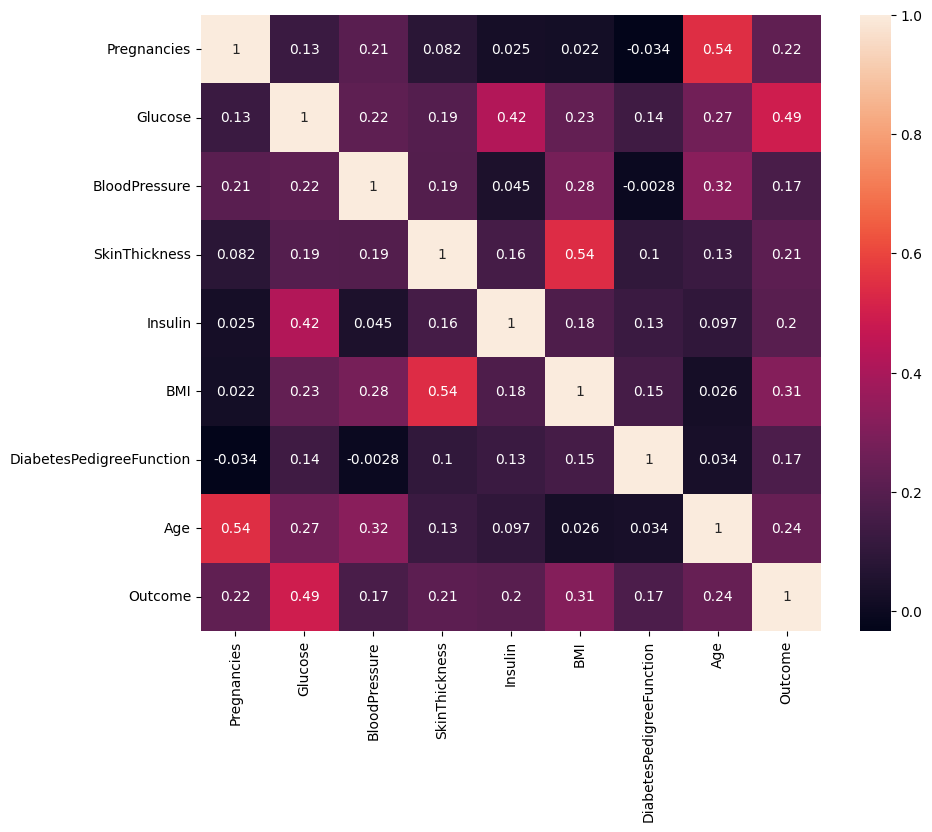

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True);

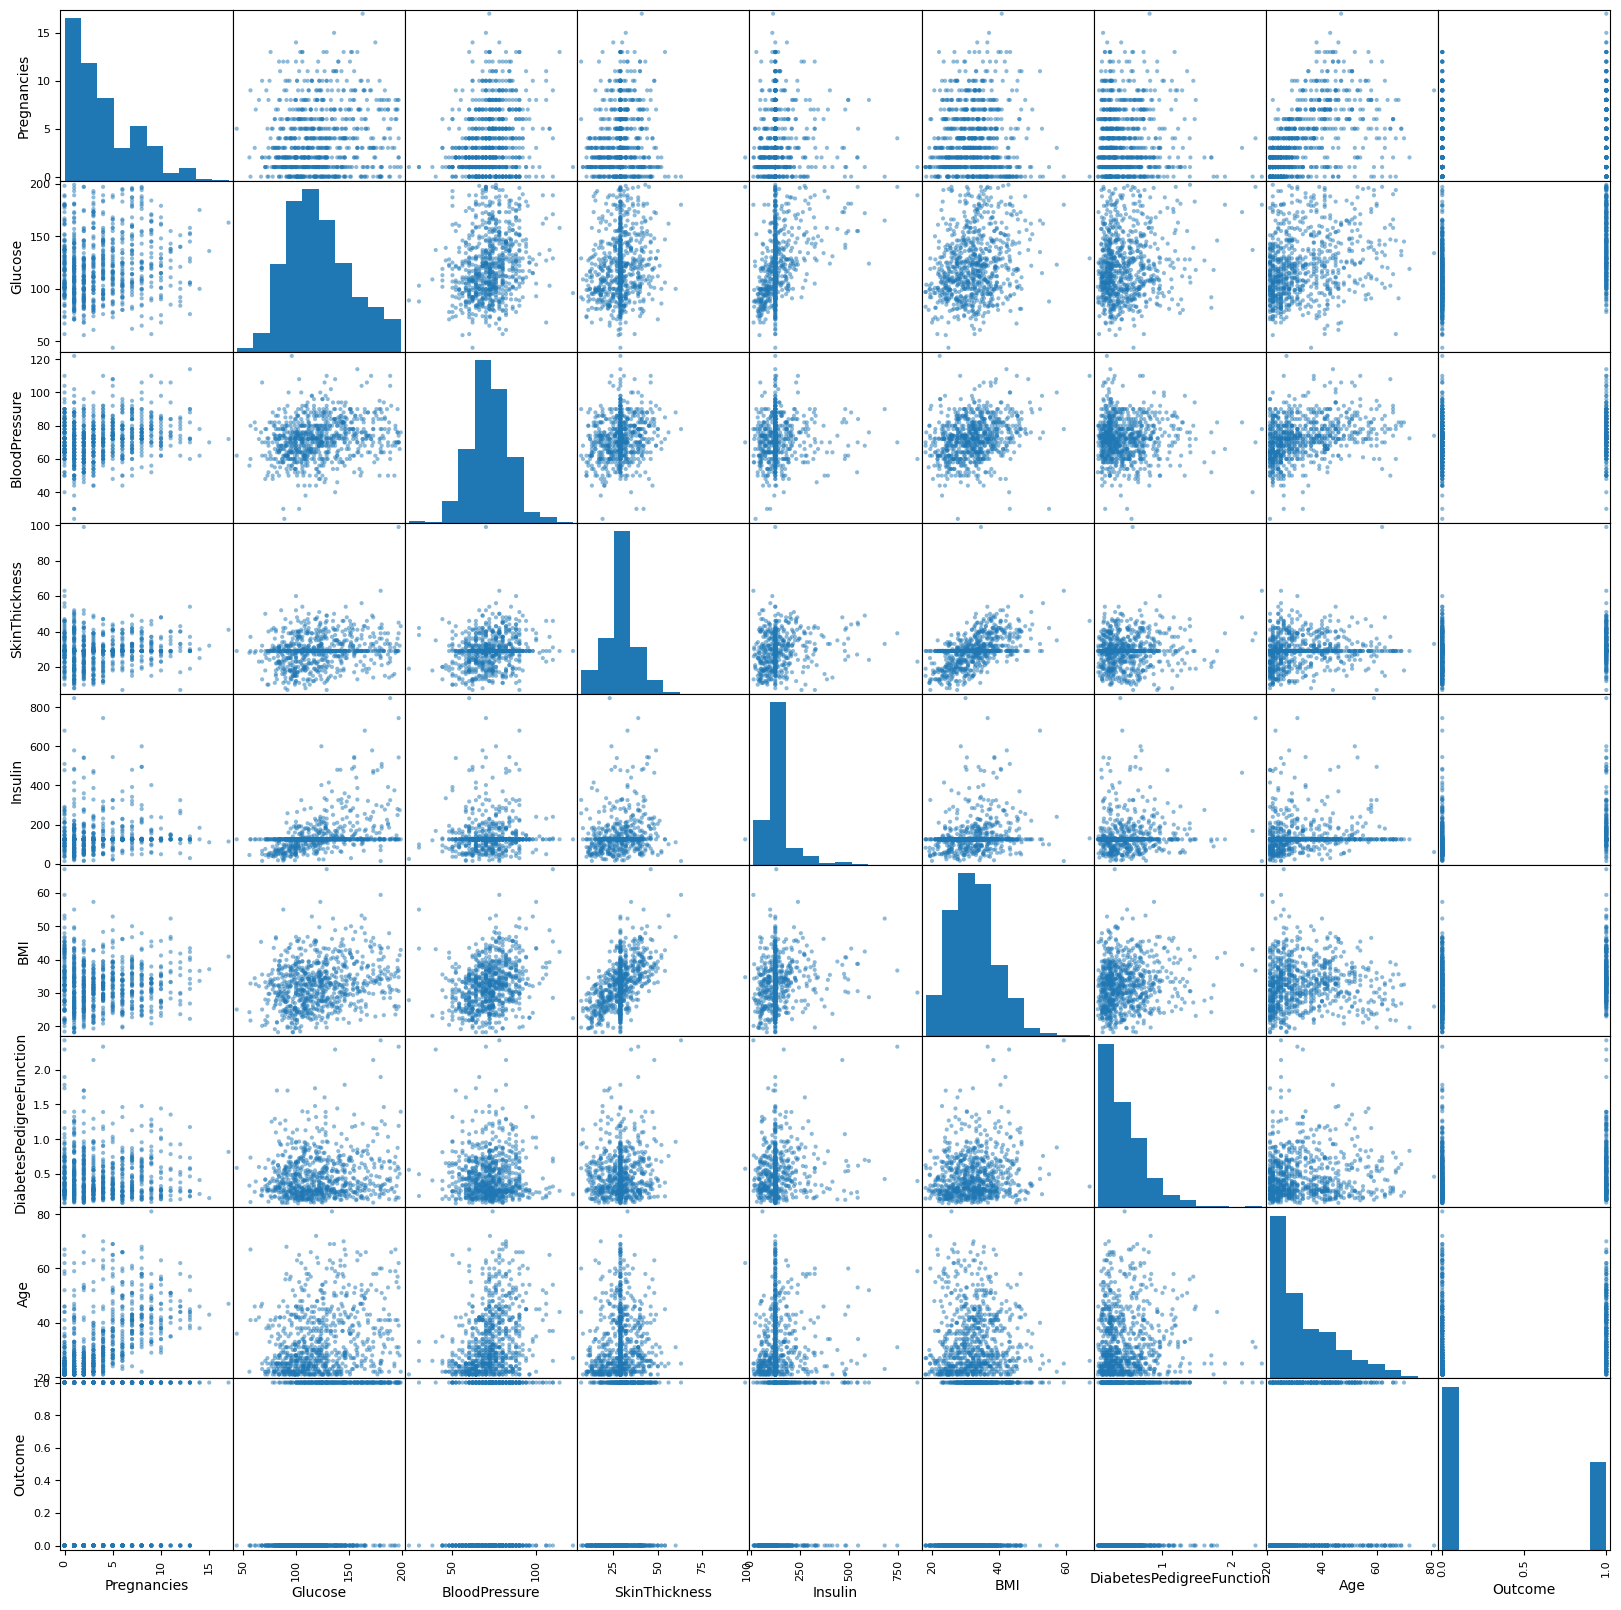

In [ ]:
pd.plotting.scatter_matrix(data, figsize=(20,20))
plt.show()

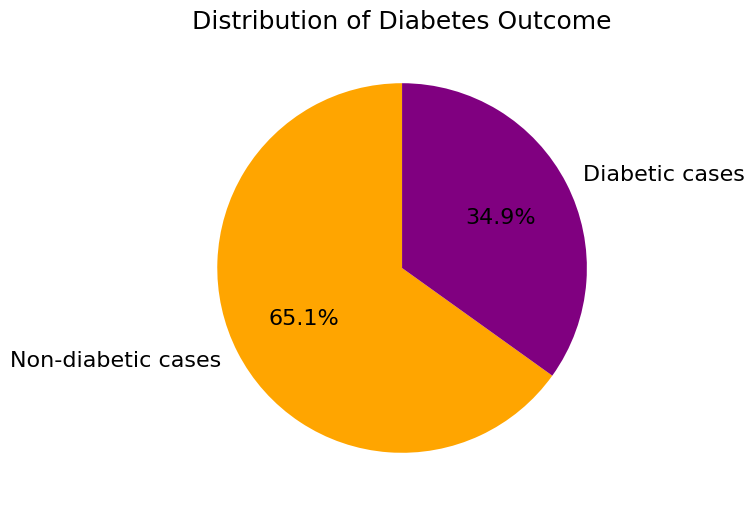

In [ ]:
# Distribution of outcome
labels = ['Non-diabetic cases', 'Diabetic cases']
colors = ['orange', 'purple']

plt.figure(figsize=(8, 6))
ax = data['Outcome'].value_counts().plot(
    kind='pie',
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 16}
)

plt.title('Distribution of Diabetes Outcome', fontsize=18)
plt.ylabel('')
plt.show()

<a class='anchor' id='anchor3'></a>
# **Results**

### 1. Cross Validation

In [ ]:
Y = data['Outcome'].values

D = pd.get_dummies(data.drop('Outcome', axis=1), drop_first=True)
X = D.values

In [ ]:
# Initialize LOOCV and Logistic Regression model
loo = LeaveOneOut()
model = LogisticRegression(max_iter=1000)

In [ ]:
# Initialize variables to store predictions and true values
y_true = []
y_pred = []

# Perform LOOCV
for train_index, test_index in loo.split(X):
    # Split data into training and testing sets using NumPy indexing
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make a prediction
    prediction = model.predict(X_test)

    # Collect true and predicted values
    y_true.append(y_test[0])
    y_pred.append(prediction[0])

In [ ]:
# Calculate precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.7177033492822966
Recall: 0.5597014925373134


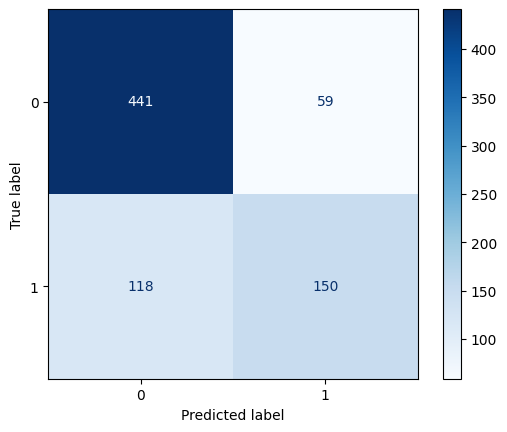

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')

The confusion matrix from the LOOCV process indicates that the classification model performs better at identifying instances of class 0 than class 1. With 443 true negatives and only 57 false positives, the model demonstrates strong performance in correctly predicting class 0. However, it struggles more with class 1, achieving 153 true positives but misclassifying 115 instances as false negatives. This suggests a potential imbalance in the model's sensitivity to class 1, as it sacrifices recall (correctly identifying all class 1 cases) in favor of precision. Overall, while the model's accuracy may appear reasonable, improvements in recall and the balance of class predictions are necessary to enhance its robustness and applicability to real-world scenarios.

In [ ]:
M = sklearn_sm(sm.OLS)
H = np.array(data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
X = sm.add_constant(H)
Y = data['Outcome']
cv_results = cross_validate(M, X, Y, cv=data.shape[0])
cv_err = np.mean(cv_results['test_score'])
cv_err

0.15826481021010685

In [ ]:
# an intercept term is included
#hp_model = sklearn_sm(sm.OLS, MS([['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]))
hp_model = sklearn_sm(sm.OLS)
X, Y = data.drop(columns=['Outcome']), data['Outcome']
## cv = data.shape[0] is LOOCV
cv_results = cross_validate(hp_model, X, Y, cv=data.shape[0])
cv_err = np.mean(cv_results['test_score'])
cv_err

0.1779046098389636

LOOCV for polynomial regressions

define the polynomials of horsepower using np.power.outer

In [ ]:
cv_error = np.zeros(5)
H = np.array(data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
Y = Y.ravel()

# Loop through polynomial degrees
for i, d in enumerate(range(1, 6)):
    # Generate polynomial features (2D array)
    X = np.hstack([H**p for p in range(d+1)])
    print(f"X.shape: {X.shape}, Degree: {d}")

    # Perform cross-validation
    M_CV = cross_validate(sklearn_sm(sm.OLS), X, Y, cv=data.shape[0], error_score='raise')
    cv_error[i] = np.mean(M_CV['test_score'])

cv_error


X.shape: (768, 16), Degree: 1
X.shape: (768, 24), Degree: 2
X.shape: (768, 32), Degree: 3
X.shape: (768, 40), Degree: 4
X.shape: (768, 48), Degree: 5


array([0.15826481, 0.1557693 , 0.16310391, 0.18146682, 3.04007753])

K-fold cross validation

In [ ]:
# Separate features (X) and target (y)
X = data.drop(columns=["Outcome"])  # Features
y = data["Outcome"]                # Target variable

# Standardize the features for better performance of the model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Perform 5-fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')

# Print the results
print(f"Mean Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation: {cv_scores.std() * 100:.2f}%")

Mean Accuracy: 76.96%
Standard Deviation: 2.79%


In [ ]:
from sklearn.model_selection import KFold, cross_validate
import numpy as np

cv_error = np.zeros(5)

H = np.array(data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
Y = Y.ravel()

cv = KFold(n_splits=10, shuffle=True, random_state=0)

# Loop through polynomial degrees
for i, d in enumerate(range(1, 6)):
    # Generate polynomial features (2D array)
    X = np.hstack([H**p for p in range(d+1)])
    print(f"X.shape: {X.shape}, Degree: {d}")

    # Perform cross-validation
    M_CV = cross_validate(sklearn_sm(sm.OLS), X, Y, cv=cv, error_score='raise')
    cv_error[i] = np.mean(M_CV['test_score'])

cv_error

X.shape: (768, 16), Degree: 1
X.shape: (768, 24), Degree: 2
X.shape: (768, 32), Degree: 3
X.shape: (768, 40), Degree: 4
X.shape: (768, 48), Degree: 5


array([0.15770832, 0.15642936, 0.16425251, 0.18486459, 4.33273193])

## 2. KNN

Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 8, 'knn__weights': 'distance'}
Best Cross-Validation F1 Score: 0.6516826118656225
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       0.62      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



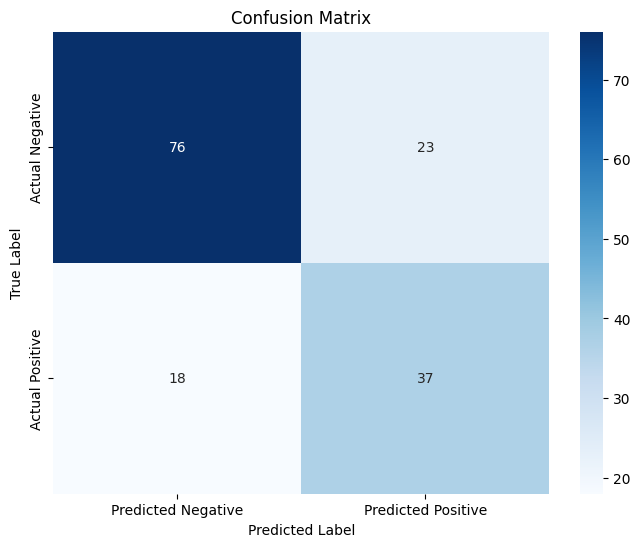

In [ ]:
# Separate features (X) and target (y)
X = data.drop(columns=["Outcome"])
y = data["Outcome"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('knn', KNeighborsClassifier())  # KNN classifier
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'knn__n_neighbors': range(1, 31),  # Test k values from 1 to 30
    'knn__weights': ['uniform', 'distance'],  # Weighting methods
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Print the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1 Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Generate and print the classification report
print(classification_report(y_test, y_pred))

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

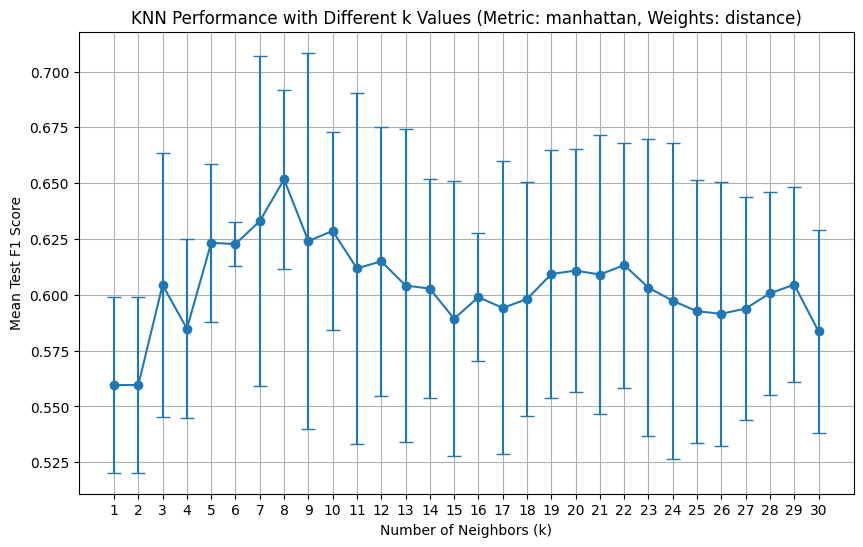

In [ ]:
# Extract cross-validation results
cv_results = grid_search.cv_results_

# Extract mean test scores and standard deviations for plotting
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']

# Get the parameter combinations
params = cv_results['params']

# Create a DataFrame for better handling
results_df = pd.DataFrame(params)
results_df['mean_test_score'] = mean_test_scores
results_df['std_test_score'] = std_test_scores

# Filter results for a specific metric and weight for better visualization
metric_to_plot = 'manhattan'  # You can change this
weights_to_plot = 'distance'  # and this

filtered_df = results_df[(results_df['knn__metric'] == metric_to_plot) &
                         (results_df['knn__weights'] == weights_to_plot)]

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(
    filtered_df['knn__n_neighbors'],
    filtered_df['mean_test_score'],
    yerr=filtered_df['std_test_score'],
    fmt='o-',
    capsize=5
)
plt.title(f'KNN Performance with Different k Values (Metric: {metric_to_plot}, Weights: {weights_to_plot})')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Test F1 Score')
plt.xticks(filtered_df['knn__n_neighbors'])
plt.grid(True)
plt.show()

## 3. Decision Tree

Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree Validation Accuracy: 0.7727
Decision Tree Validation F1 Score: 0.6847


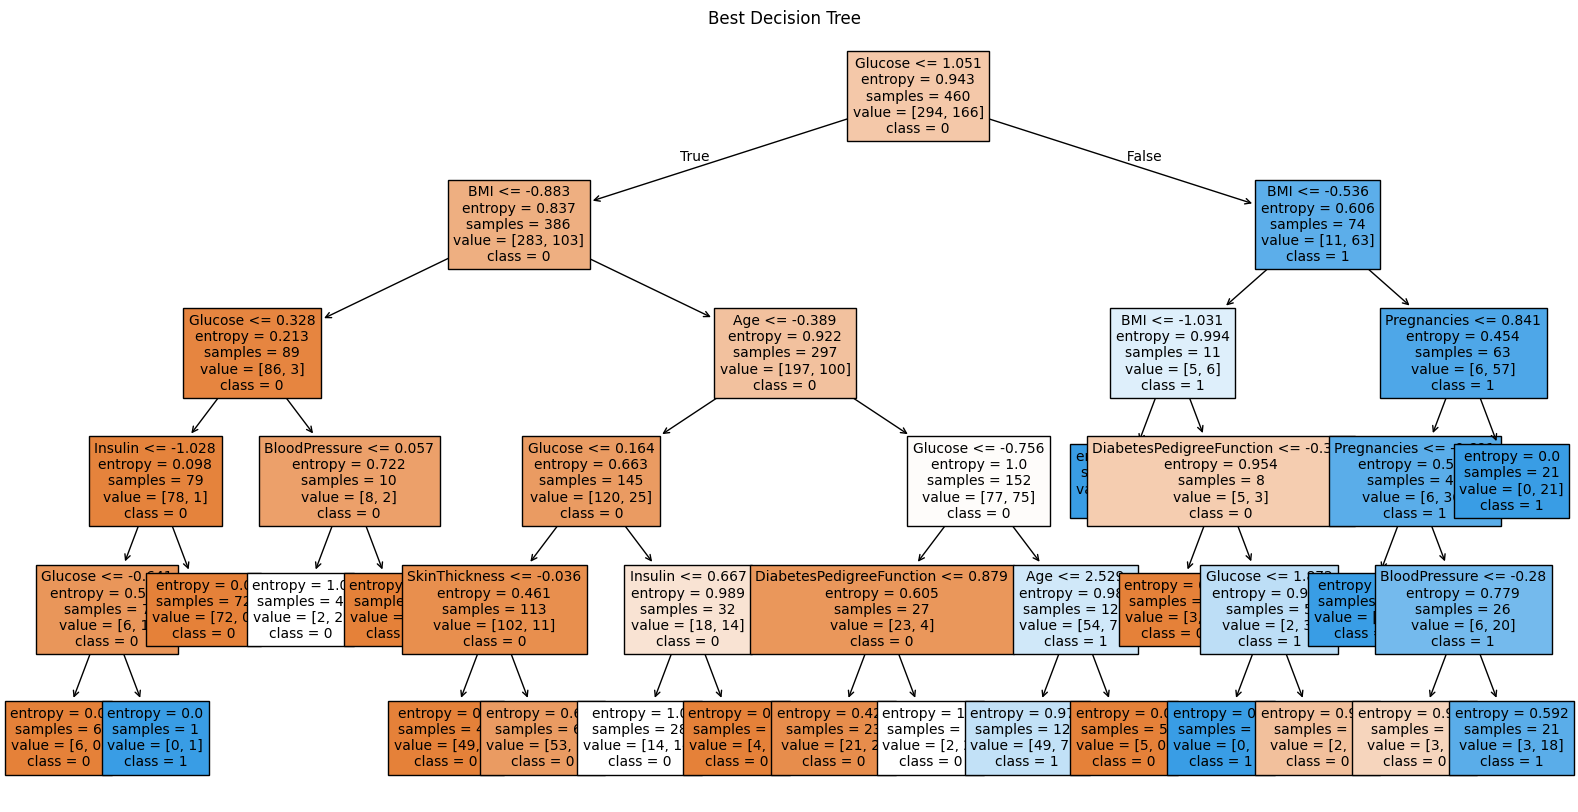

Best Random Forest Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Random Forest Validation Accuracy: 0.7792
Random Forest Validation F1 Score: 0.6731
Decision Tree Test Performance:
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       102
           1       0.57      0.63      0.60        52

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.71      0.72       154

[[77 25]
 [19 33]]
Random Forest Test Performance:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       102
           1       0.64      0.65      0.65        52

    accuracy                           0.76       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

[[83 19]
 [18 34]]


In [ ]:
# Assuming 'data' is your DataFrame and has been preprocessed

# Split features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split data into training, validation, and test sets (e.g., 60/20/20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 1. Decision Tree
# Hyperparameter tuning using GridSearchCV
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],  # Increased range of depths
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'] # Added entropy as another option
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='f1')
grid_search_dt.fit(X_train_scaled, y_train)

print("Best Decision Tree Parameters:", grid_search_dt.best_params_)
best_dt_model = grid_search_dt.best_estimator_

# Evaluate on validation set
y_val_pred_dt = best_dt_model.predict(X_val_scaled)
print(f"Decision Tree Validation Accuracy: {accuracy_score(y_val, y_val_pred_dt):.4f}")
print(f"Decision Tree Validation F1 Score: {f1_score(y_val, y_val_pred_dt):.4f}")

# Plot the best decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, filled=True, feature_names=X.columns, class_names=['0', '1'], fontsize=10)
plt.title("Best Decision Tree")
plt.show()

# 2. Random Forest
# Hyperparameter tuning using GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],  # Reduced the number of estimators for faster computation
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1', n_jobs=-1) # Added n_jobs=-1 to utilize all processors for faster computation
grid_search_rf.fit(X_train_scaled, y_train)

print("Best Random Forest Parameters:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

# Evaluate on validation set
y_val_pred_rf = best_rf_model.predict(X_val_scaled)
print(f"Random Forest Validation Accuracy: {accuracy_score(y_val, y_val_pred_rf):.4f}")
print(f"Random Forest Validation F1 Score: {f1_score(y_val, y_val_pred_rf):.4f}")

# 3. Final Evaluation on Test Set (for both models)
y_test_pred_dt = best_dt_model.predict(X_test_scaled)
y_test_pred_rf = best_rf_model.predict(X_test_scaled)

print("Decision Tree Test Performance:")
print(classification_report(y_test, y_test_pred_dt))
print(confusion_matrix(y_test, y_test_pred_dt))

print("Random Forest Test Performance:")
print(classification_report(y_test, y_test_pred_rf))
print(confusion_matrix(y_test, y_test_pred_rf))

## 4. Model Selection

In [ ]:
# Prepare data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# We are assessing 5 different models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

results = {}
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

    # Fit model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]),
        'Cross-Val Mean': cv_scores.mean(),
        'Cross-Val Std': cv_scores.std()
    }

# Results
for name, metrics in results.items():
    print(f"\n{name} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Logistic Regression Performance:
Accuracy: 0.7532
Precision: 0.6667
Recall: 0.6182
F1 Score: 0.6415
ROC AUC: 0.8231
Cross-Val Mean: 0.7688
Cross-Val Std: 0.0304

KNN Performance:
Accuracy: 0.7273
Precision: 0.6032
Recall: 0.6909
F1 Score: 0.6441
ROC AUC: 0.7642
Cross-Val Mean: 0.7444
Cross-Val Std: 0.0289

Decision Tree Performance:
Accuracy: 0.6948
Precision: 0.5667
Recall: 0.6182
F1 Score: 0.5913
ROC AUC: 0.6778
Cross-Val Mean: 0.6807
Cross-Val Std: 0.0453

Random Forest Performance:
Accuracy: 0.7597
Precision: 0.6607
Recall: 0.6727
F1 Score: 0.6667
ROC AUC: 0.8254
Cross-Val Mean: 0.7737
Cross-Val Std: 0.0311

Neural Network Performance:
Accuracy: 0.7468
Precision: 0.6379
Recall: 0.6727
F1 Score: 0.6549
ROC AUC: 0.8000
Cross-Val Mean: 0.7720
Cross-Val Std: 0.0275


Based on the results, we assume that Random Forest is our best approach. Random Forest is identified as the best model while showing high scores in all the metrics. Logistic Regression also performs well, achieving the highest accuracy (0.7532), but this is because the imbalance of the outcome variable.
We are going to use Random Forest for the rest of our analysis.


## 5. Random Forest

In [ ]:
X_train_validate, X_test_validate, y_train_validate, y_test_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
validation_mse_list = []
for n_estimators in np.arange(10, 150, 10):
  for max_depth in np.arange(1, 21, 1):

    #reg_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    reg_tree = RandomForestClassifier(n_estimators = n_estimators, max_depth=max_depth, random_state=42)
    reg_tree.fit(X_train_validate, y_train_validate)

    # plt.figure(figsize=(30, 20))
    # plot_tree(reg_tree, feature_names=X_train.columns, filled=True, fontsize=10)
    # plt.title("Regression Tree")
    # plt.show()

    train_pred_tree = reg_tree.predict(X_train_validate)
    test_pred_tree = reg_tree.predict(X_test_validate)
    # train_mse_tree = mean_squared_error(y_train_validate, train_pred_tree)
    # test_mse_tree = mean_squared_error(y_test_validate, test_pred_tree)
    train_f1_score = f1_score(y_train_validate, train_pred_tree)
    test_f1_score = f1_score(y_test_validate, test_pred_tree)
    print(f'Running for n_estimators: {n_estimators}, max_depth: {max_depth}')
    print(f"Training F1 Score (Random Forest): {train_f1_score:.4f}")
    print(f"Validation F1 Score (Random Forest): {test_f1_score:.4f}")
    validation_mse_list.append([n_estimators, max_depth, test_f1_score])

Running for n_estimators: 10, max_depth: 1
Training F1 Score (Random Forest): 0.4138
Validation F1 Score (Random Forest): 0.2353
Running for n_estimators: 10, max_depth: 2
Training F1 Score (Random Forest): 0.6121
Validation F1 Score (Random Forest): 0.4923
Running for n_estimators: 10, max_depth: 3
Training F1 Score (Random Forest): 0.6645
Validation F1 Score (Random Forest): 0.6176
Running for n_estimators: 10, max_depth: 4
Training F1 Score (Random Forest): 0.7531
Validation F1 Score (Random Forest): 0.5753
Running for n_estimators: 10, max_depth: 5
Training F1 Score (Random Forest): 0.8000
Validation F1 Score (Random Forest): 0.5789
Running for n_estimators: 10, max_depth: 6
Training F1 Score (Random Forest): 0.8494
Validation F1 Score (Random Forest): 0.5405
Running for n_estimators: 10, max_depth: 7
Training F1 Score (Random Forest): 0.8997
Validation F1 Score (Random Forest): 0.5526
Running for n_estimators: 10, max_depth: 8
Training F1 Score (Random Forest): 0.9086
Validation F

In [ ]:
# Find the combo with the smallest validation MSE.
best_combo = sorted(validation_mse_list, key=lambda x: x[2], reverse=True)[0]
best_n_estimators = best_combo[0]
best_max_depth = best_combo[1]
best_validatio_f1_score = best_combo[2]
best_n_estimators, best_max_depth, best_validatio_f1_score

(70, 4, 0.6756756756756757)

In [ ]:
#reg_tree = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
reg_tree = RandomForestClassifier(n_estimators = best_n_estimators, max_depth = best_max_depth, random_state = 42)
reg_tree.fit(X_train, y_train)

# plt.figure(figsize=(30, 20))
# plot_tree(reg_tree, feature_names=X_train.columns, filled=True, fontsize=10)
# plt.title("Regression Tree")
# plt.show()

train_pred_tree = reg_tree.predict(X_train)
test_pred_tree = reg_tree.predict(X_test)
train_f1_score = f1_score(y_train, train_pred_tree)
test_f1_score = f1_score(y_test, test_pred_tree)

print(f"Training f1 score (Random Forest): {train_f1_score:.4f}")
print(f"Test f1 score (Random Forest): {test_f1_score:.4f}")

Training f1 score (Random Forest): 0.7116
Test f1 score (Random Forest): 0.6733


 We grid search using 2 parameters, n_estimators, and max_depth, on the validation set. Then using the best parameters as input then fit the model and see the performance on the test set. We got the Training f1 score (Random Forest): of 0.7116 and the Test f1 score (Random Forest): of 0.6733.


## 6. Feature importance

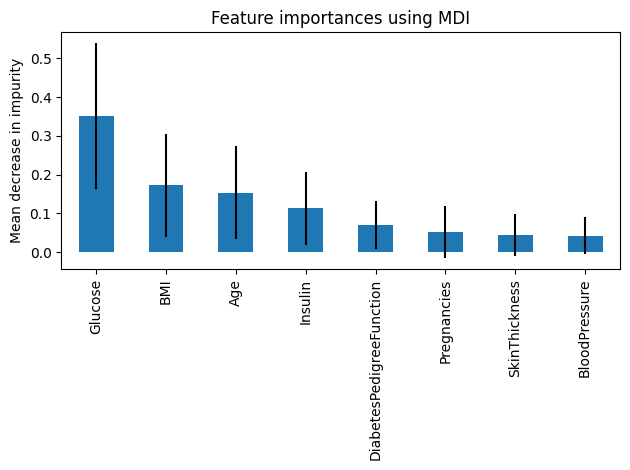

In [ ]:
# Assuming 'data' is the dataset
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=['Outcome']),
    data['Outcome'],
    test_size=0.2,
    random_state=42
)

X_train = pd.DataFrame(X_train, columns=data.drop(columns=['Outcome']).columns)
y_train = pd.Series(y_train, name='Outcome')
reg_tree = RandomForestClassifier(n_estimators = best_n_estimators, max_depth = best_max_depth, random_state = 42)
reg_tree.fit(X_train, y_train)

importances = reg_tree.feature_importances_
std = np.std([tree.feature_importances_ for tree in reg_tree.estimators_], axis=0)

# Sort the feature importances in descending order
sorted_indices = np.argsort(-importances)
sorted_importances = importances[sorted_indices]
sorted_features = [X_train.columns[i] for i in sorted_indices]

forest_importances = pd.Series(sorted_importances, index=sorted_features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std[sorted_indices], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

We lastly used the results from our Random Forest model to generate a feature importance graph, which highlights the key predictors for diabetes. The graph reveals that glucose, BMI, and age are the top three most influential features. These results also match our intuition and existing medical knowledge, as these three features are well-established risk factors for diabetes.


<a class='anchor' id='anchor4'></a>
# **Conclusion**

Our investigation aimed to identify the key factors influencing the risk of developing diabetes using machine learning models and a comprehensive dataset. Through our analysis, we derived several insights about the relationships between physiological and lifestyle features and diabetes risk. Key findings include:
1. Importance of Glucose Levels: Glucose emerged as the most significant factor influencing diabetes risk, with the highest correlation with the outcome variable (0.49) and the greatest feature importance in the Random Forest model. This finding aligns with medical knowledge, as elevated glucose levels are a hallmark of diabetes.
2. Secondary Factors: BMI (Body Mass Index) and Age were identified as the next most important contributors to diabetes risk, as evidenced by both their correlation with the outcome and their feature importance scores. This suggests that maintaining a healthy weight and monitoring age-related changes are critical for diabetes prevention.
3. Weaker Influencers: While other features such as Insulin, SkinThickness, and Pregnancies also contributed to the model, their impact was comparatively weaker. This may reflect individual variability in how these factors manifest in diabetes risk.
4. Model Performance: Among the models tested, Logistic Regression performed best in terms of accuracy (75.32%), while Random Forest achieved the highest ROC AUC score (0.8349). These results highlight the trade-off between interpretability and predictive performance across different algorithms. Random Forest’s feature importance analysis further validated the relative influence of each factor.
Our approach combined statistical insights with model evaluation to draw meaningful conclusions about diabetes risk factors. The pair plots and correlation matrix provided an initial understanding of feature relationships, while machine learning models quantified their predictive significance.

<a class='anchor' id='anchor5'></a>
# **Discussion and Limitation**

Our investigation utilized several machine learning models—Logistic Regression, KNN, Decision Trees, Random Forest, and Neural Networks—to address the question of what factors influence diabetes risk. While Logistic Regression provided a strong baseline with high accuracy, Random Forest stood out for its ability to handle nonlinear interactions and provide feature importance metrics. The process highlighted the value of combining statistical analysis with machine learning to gain a more nuanced understanding of complex health problems.
The results underscore the multifaceted nature of diabetes risk, where physiological indicators (e.g., Glucose, BMI) interact with demographic factors (e.g., Age) to shape outcomes. The Random Forest model, with its superior ROC AUC and feature importance ranking, allowed us to identify the most influential predictors effectively.

1. Dataset Size and Quality: The dataset, while comprehensive, may not be representative of broader populations. Limited sample size and potential class imbalance could affect model generalizability and robustness.
2. Feature Selection: Some variables, such as SkinThickness and Insulin, showed weaker relationships with the outcome, possibly due to measurement variability or missing data. This highlights the need for more precise data collection in future studies.
3. Model Interpretability: While Random Forest provided strong performance, its "black box" nature limits interpretability compared to simpler models like Logistic Regression. Balancing interpretability and accuracy remains a challenge in machine learning.
4. Potential Confounders: Factors such as physical activity, diet, and genetic predisposition were not included in the dataset, which could influence results. This limitation points to the need for a more holistic approach to data collection.

Potential Expectations:
1. Future studies should leverage larger and more diverse datasets to improve the generalizability of findings. Incorporating additional features, such as lifestyle factors and genetic markers, would enhance the scope of the analysis.
2. Exploring ensemble methods, such as Gradient Boosting or XGBoost, could improve predictive accuracy and handle complex interactions more effectively.
3. Incorporating temporal data would allow for dynamic risk modeling, providing insights into how diabetes risk evolves over time and identifying early intervention opportunities.
4. Translating these findings into actionable recommendations for healthcare practitioners would bridge the gap between data science and real-world impact. Developing user-friendly tools for clinicians to assess diabetes risk based on these models could have transformative effects on public health.
In conclusion, our investigation has provided valuable insights into the factors influencing diabetes risk. However, addressing the limitations and pursuing future directions will be essential for advancing this line of research and improving outcomes for individuals at risk of diabetes.
